# PEC 2 Asignatura Aprendizaje Automático Aplicado

## Máster en Data Science - UCJC

### Curso 2023/2024

Profesor: Francisco Lamas López - francisco.lamas@ucjc.edu

- Fecha de entrega a los alumnos: miércoles **17ENE2024**


- Fecha límite de entrega de soluciones: miércoles **07FEB2024**


- Fecha orientativa de correcciones: miércoles **21FEB2024**

### INSTRUCCIONES:

Resolver individualmente las siguientes 12 preguntas (cada una de las cuales tiene idéntica valoración, 1/12 del total)


Se dará una puntuación sobre 10 a cada alumno para esta PEC2 (75% del total de PEC's)


Rellenar sobre este Notebook (entregar como archivo .ipynb)

**Aspectos importantes a tener en cuenta:**

- Seguir los pasos recomendados en cada una de las 12 preguntas (como listas de ítems en el markdown), ya que os servirán como guía para resolverlas

- Intentar siempre, en la parte de análisis y comparación, plotear y exponer gráficos cuando sea posible sobre los resultados obtenidos

- Comentar y argumentar los resultados obtenidos

**En caso de no poder entregarla a través del BlackBoard, enviar antes de la fecha límite al email francisco.lamas@ucjc.edu (explicar en el email error obtenido durante la subida a BlackBoard)**

### ALUMNO (APELLIDOS, NOMBRE):

Astudillo Astudillo Milton Mauricio

### EMAIL ALUMNO:

miltonmauricio.astudillo@alumno.ucjc.edu

#### Uso de Datasets en la PEC2

En esta práctica, se deben utilizar los datasets que se especifiquen en los ejercicios del Conjunto 2, 3 y 4 (preguntas 4 a 12). Utilice datasets a elección del alumno en las preguntas 1, 2 y 3.

## Conjunto 1

### Pregunta 1

Evalúa al menos 3 modelos de clasificación supervisada (SVC, Regresor Logístico, KNN Classifier... por ejemplo) con distintos repartos de train-test y haciendo Cross-Validation sobre ellos. Busca una combinación de hiperarámetros óptima para cada uno de ellos para distintos test_sizes entre 0.1 y 0.4. Razonar cual sería el modelo que mejor generaliza los resultados, entre los entrenamientos realizados.

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score



#### Importamos los datos desde sklearn

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target


#### Graficamos los datos 

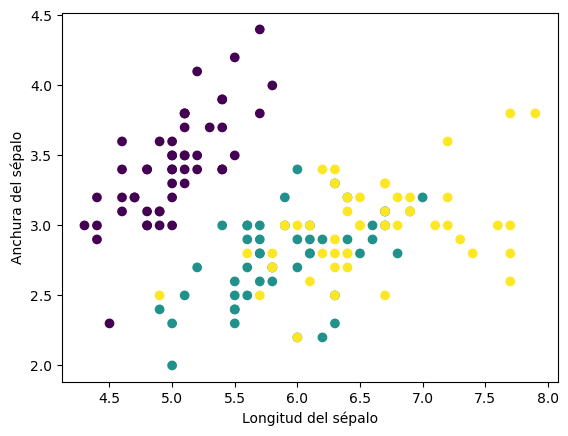

In [4]:
import matplotlib.pyplot as plt

# Creamos un diagrama de dispersión
plt.scatter(X[:, 0], X[:, 1], c=y)

# Añadimos etiquetas al eje x y al eje y
plt.xlabel("Longitud del sépalo")
plt.ylabel("Anchura del sépalo")

# Mostramos el gráfico
plt.show()


El gráfico muestra que las flores de iris se pueden clasificar fácilmente en tres grupos, según la longitud y anchura de sus sépalos.

#### Dividimos los datos en conjuntos de entrenamiento y prueba(0.30)

In [5]:
from sklearn.model_selection import train_test_split

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1994)


#### Escalamos los datos

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#### Definimos los modelos y los diccionarios de hiperparámetros a ajustar

In [7]:
models = {
    'SVC': (SVC(), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
    'Logistic Regression': (LogisticRegression(max_iter=1000), {'C': [0.1, 1, 10], 'penalty': ['l2']}),
    'KNN': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7], 'p': [1, 2]})
}


#### Entrenamiento de los modelos 

In [8]:
results = {}  # Aquí vamos a guardar los resultados de la evaluación de los modelos

for model_name, (model, params) in models.items():
    # Configuramos GridSearchCV para buscar los mejores hiperparámetros del modelo actual
    grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy')
    grid_search.fit(X_train_scaled, y_train)  # Entrenamos el modelo con los datos de entrenamiento escalados
    
    # Hacemos predicciones en el conjunto de prueba y calculamos la precisión del modelo
    y_pred = grid_search.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Guardamos los resultados de la evaluación en el diccionario 'results'
    results[model_name] = {
        'best_params': grid_search.best_params_,  # Mejores hiperparámetros encontrados
        'accuracy': accuracy  # Precisión del modelo en el conjunto de prueba
    }
    print(f"Modelo: {model_name}, Accuracy: {accuracy:.4f}")


Modelo: SVC, Accuracy: 0.9556
Modelo: Logistic Regression, Accuracy: 0.9778
Modelo: KNN, Accuracy: 0.9333


#### Realizmos vuelta el entrenamiento de los modelos para un test_sizes = [0.1, 0.2, 0.3, 0.4]

In [10]:
test_sizes = [0.1, 0.2, 0.3, 0.4]

results = {}  

for model_name, (model, params) in models.items():
    print(f"Evaluando {model_name}:")
    results[model_name] = {}  
    
    for test_size in test_sizes:
        print(f"\tTest Size: {test_size}")
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1994)
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy')
        grid_search.fit(X_train_scaled, y_train)
        
        y_pred = grid_search.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        
        results[model_name][test_size] = {
            'best_params': grid_search.best_params_,
            'accuracy': accuracy
        }
        print(f"\tAccuracy: {accuracy:.4f}")


Evaluando SVC:
	Test Size: 0.1
	Accuracy: 1.0000
	Test Size: 0.2
	Accuracy: 0.9333
	Test Size: 0.3
	Accuracy: 0.9556
	Test Size: 0.4
	Accuracy: 0.9333
Evaluando Logistic Regression:
	Test Size: 0.1
	Accuracy: 1.0000
	Test Size: 0.2
	Accuracy: 0.9667
	Test Size: 0.3
	Accuracy: 0.9778
	Test Size: 0.4
	Accuracy: 0.9667
Evaluando KNN:
	Test Size: 0.1
	Accuracy: 1.0000
	Test Size: 0.2
	Accuracy: 0.9667
	Test Size: 0.3
	Accuracy: 0.9333
	Test Size: 0.4
	Accuracy: 0.9500


SVC:

Para un tamaño de prueba del 10%, el modelo SVC logra una precisión del 100%. 
A medida que aumenta el tamaño de la prueba, la precisión tiende a disminuir ligeramente, alcanzando un 93.33% de precisión con un tamaño de prueba del 20% y del 40%, y un 95.56% con un tamaño del 30%.

Regresión Logística:


logra una precisión del 100% para un tamaño de prueba del 10%.
La precisión se mantiene alta en todos los tamaños de prueba, con valores de 96.67% para tamaños de prueba del 20% y 40%, y de 97.78% para un tamaño del 30%.

KNN:

logra una precisión del 100% para un tamaño de prueba del 10%.
La precisión varía entre el 93.33% y el 96.67% para tamaños de prueba del 20% y del 30%, respectivamente. Para un tamaño de prueba del 40%, la precisión es del 95.00%.

En conclusión la Regresión Logística parece mostrar una consistencia notable en la precisión a lo largo de los diferentes tamaños de prueba, con puntajes muy altos en cada caso. tambien observamos que en el caso de poner 10 % para los tamaños de prueba nos da un valor de precisión muy alto, esto puede deberse a la poca catidan de datos que tomamos para la prueba y lo optimo seria por encima del 25 %.

### Pregunta 2

Realiza al menos 2 transformaciones de reducción de dimensionalidad sobre el Dataset utilizando un mismo algoritmo (p.e. PCA). Evalúe las diferencias de entrenar un modelo de clasificación (como los utilizados al principio de la PEC2) con todo el Dataset, o con el Dataset reducido a diferentes dimensiones. Graficar los resultados y evaluar el tiempo de computación de entrenamiento de modelos. No olvides el efecto de escalar los datos previamente a aplicar el PCA. Justificar los resultados encontrados.

Graficar los resultados y comentar las diferencias de entrenar y evaluar el modelo sobre el Dataset transformado con sus dimensiones reducidas. Ejecuta diferentes visualizaciones de los datos tratados.

#### Vamos a realizar este ejercicio tomando de nuevo el dataset iris

In [20]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cargar el dataset Iris
iris = load_iris()
X, y = iris.data, iris.target

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1994)

# Escalar los datos para que tengan media cero y varianza unitaria
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#### Aplicamos PCA

In [13]:
from sklearn.decomposition import PCA

# Inicializar y aplicar PCA para reducir la dimensionalidad a 2 componentes principales
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


Entrenamos los modelos

In [15]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time

# Inicializar modelos de clasificación
models = {
    'SVC': SVC(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier()
}

# Entrenar modelos y evaluar su precisión
results = {}

for model_name, model in models.items():
    start_time = time.time()
    model.fit(X_train_pca, y_train)
    end_time = time.time()
    train_time = end_time - start_time

    y_pred = model.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = {'accuracy': accuracy, 'train_time': train_time}


In [17]:
results

{'SVC': {'accuracy': 0.8888888888888888, 'train_time': 0.0029981136322021484},
 'Logistic Regression': {'accuracy': 0.9111111111111111,
  'train_time': 0.007993221282958984},
 'KNN': {'accuracy': 0.9111111111111111, 'train_time': 0.0025663375854492188}}

#### Graficamos resultados

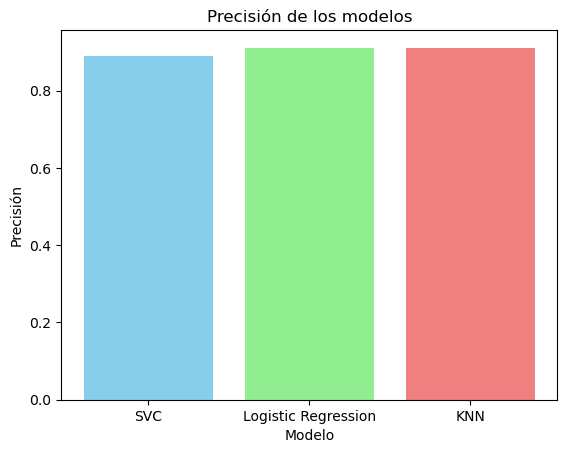

In [19]:
import matplotlib.pyplot as plt

# Graficar la precisión de los modelos
plt.bar(results.keys(), [result['accuracy'] for result in results.values()], color=['skyblue', 'lightgreen', 'lightcoral'])
plt.xlabel('Modelo')
plt.ylabel('Precisión')
plt.title('Precisión de los modelos')
plt.show()


### Pregunta 3

Utiliza Árboles de Decisión para graficar los parámetros más importantes del dataset escogido. Crea distintos árboles modificando los parámetros de modelo más importantes (como p.e. el max_depth, min_samples_leaf... y otros)

Graficar los resultados de al menos 4 árboles, optimizando distintos tipos de parámetros

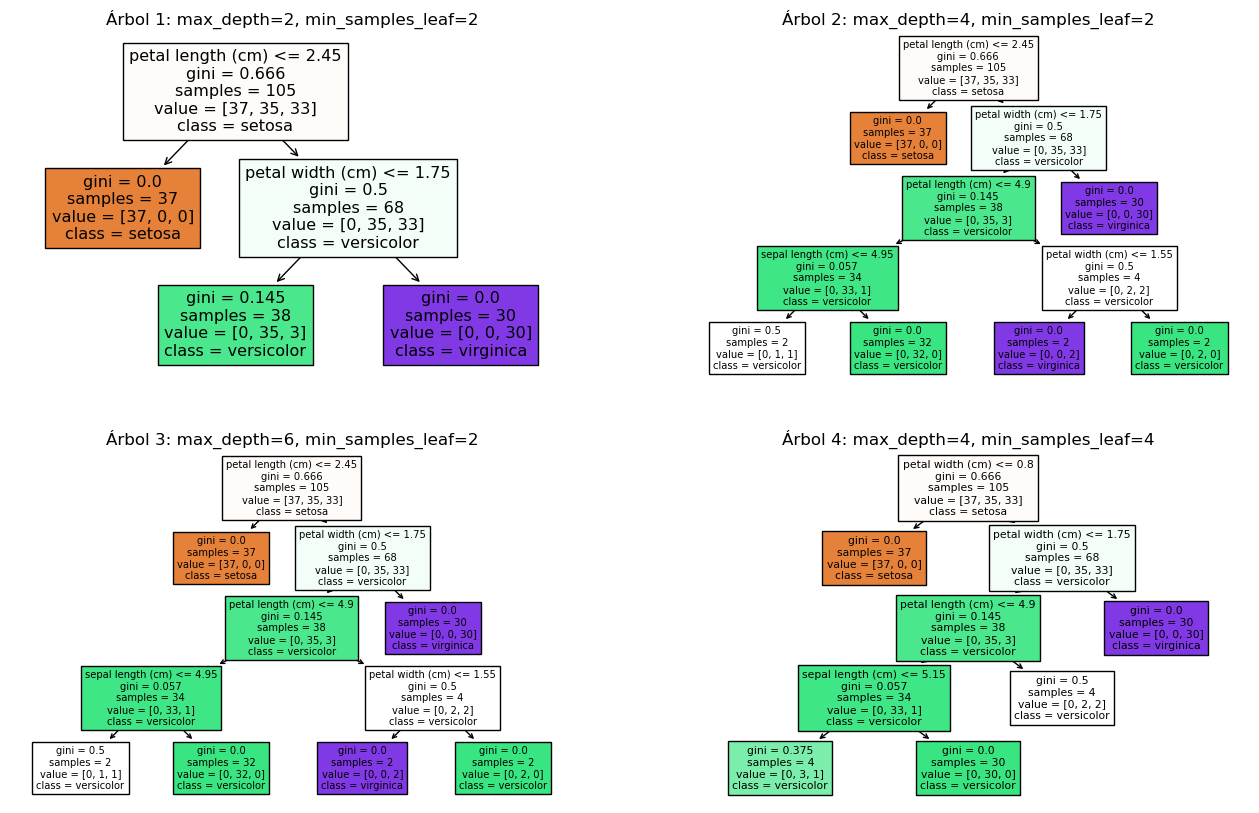

In [23]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Cargar el dataset Iris
iris = load_iris()
X, y = iris.data, iris.target

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1994)


# Definir diferentes configuraciones de parámetros para los árboles de decisión
params = [
    {'max_depth': 2, 'min_samples_leaf': 2},
    {'max_depth': 4, 'min_samples_leaf': 2},
    {'max_depth': 6, 'min_samples_leaf': 2},
    {'max_depth': 4, 'min_samples_leaf': 4}
]

# Entrenar y graficar los árboles de decisión para cada configuración de parámetros
plt.figure(figsize=(16, 10))
for i, param_set in enumerate(params, 1):
    # Entrenar el árbol de decisión
    tree = DecisionTreeClassifier(**param_set)
    tree.fit(X_train, y_train)
    
    # Graficar el árbol de decisión
    plt.subplot(2, 2, i)
    plot_tree(tree, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
    plt.title(f"Árbol {i}: max_depth={param_set['max_depth']}, min_samples_leaf={param_set['min_samples_leaf']}")

plt.show()



podemos concluir lo siguiente:

*La profundidad del árbol (max_depth) y el número mínimo de muestras en las hojas (min_samples_leaf) son parámetros clave que afectan la complejidad y la capacidad de generalización del árbol.

*Árboles con una profundidad mayor capturan relaciones más complejas, pero pueden sobreajustarse a los datos de entrenamiento.

*Un valor más alto de min_samples_leaf conduce a árboles más pequeños y menos propensos al sobreajuste, pero pueden perder cierta capacidad de capturar relaciones sutiles.

## Conjunto 2

El fichero datos_pago_microcreditos.csv contiene 30000 transacciones bancarias relativas al pago o impago de microcreditos. El dataset consta de 62 dimensiones propietarias de las cuales el banco no ha proporcionado informacion por confidencialidad, a parte de su valor. La matriz de entrada se encuentra en x_train, e y_train contiene la etiqueta relativa a esa transaccion, un 1 indica que si se pagó el microcredito y un 0 que no se pagó.

Considera que el tamaño del dataset es lo suficientemente grande como para, dependiendo de los recursos de la maquina, poder tardar varias horas en entrenar modelos complejos. Usando verbose=4 durante el fit para la optimización de parámetros podras ver el tiempo que tarda cada fit. El valor del parámetro "verbose" es un número entero que indica el nivel de detalle de la información que se desea mostrar durante el entrenamiento del modelo.

Ejecuta el código inicial para estandarizar los datos y contesta las siguientes preguntas.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
data_file='datos_pago_microcreditos.csv'

pdl=pd.read_csv(data_file)

In [3]:
pdl["payment"]=np.where(pdl["payment"]=="Success",1,0)

k=pdl.columns

for col in k:
    if pdl[col].dtype=='object':
        temp=pd.get_dummies(pdl[col],drop_first=True,prefix=col)
        pdl=pd.concat([pdl,temp],axis=1)
        pdl.drop([col],axis=1,inplace=True)


pdl.dropna(axis=0,inplace=True)


In [4]:
pdl_train, pdl_test = train_test_split(pdl, test_size = 0.2,random_state=2)

#x_train=pdl_train.drop(["payment"],1)
x_train=pdl_train.drop(columns="payment")
y_train=pdl_train["payment"]

#x_test=pdl_test.drop(["payment"],1)
x_test=pdl_test.drop(columns="payment")
y_test=pdl_test["payment"]

x_train.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)

In [5]:
y_train

0        0
1        1
2        0
3        0
4        1
        ..
23995    0
23996    1
23997    0
23998    0
23999    1
Name: payment, Length: 24000, dtype: int32

### Pregunta 4

Usando RandomSearchCV, identifica para un clasificador K-NN el numero de vecinos entre 1 y 30 que optimiza el resultado usando como scoring de la optimizacion el area bajo la curva (roc_auc) y con 10 folds para la validacion cruzada. Presenta los parametros optimos y evalúa el clasificador optimo con esos parámetros.

In [6]:
from  sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import roc_auc_score

#### Definimos el clasificador KNN

In [7]:
knn=KNeighborsClassifier()
print(knn.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


#### Definimos el rango de parámetros a explorar

In [8]:

param_grid = {'n_neighbors': np.arange(1, 31)}

#### Realizamos la búsqueda aleatoria de hiperparámetros utilizando RandomizedSearchCV para un clasificador K-NN.

In [9]:
# Define el esquema de validación cruzada
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Realiza la búsqueda aleatoria de hiperparámetros
random_search = RandomizedSearchCV(knn, param_distributions=param_grid, n_iter=10, scoring='roc_auc', cv=cv, random_state=42)
random_search.fit(x_train, y_train)


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])},
                   random_state=42, scoring='roc_auc')

La combinación óptima de parámetros encontrada durante la búsqueda aleatoria es 'weights 'uniform' y 'n_neighbors': 29', lo que indica que el modelo K-NN obtuvo el mejor rendimiento con estos parámetros en términos de la métrica ROC AUC.

In [10]:
# Obtiene los mejores parámetros encontrados
best_params = random_search.best_params_
print("Mejores parámetros encontrados:", best_params)

Mejores parámetros encontrados: {'n_neighbors': 29}


#### Probamos los parámetros establecidos como óptimos

In [11]:
# Evalúa el clasificador óptimo en el conjunto de prueba
best_estimator = random_search.best_estimator_
y_pred = best_estimator.predict(x_test)
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC en el conjunto de prueba:", roc_auc)

ROC AUC en el conjunto de prueba: 0.6616386098889274


### Pregunta 5

Obten la matriz de confusión del clasificador optimo anterior. ¿cómo lees cada uno de los valores?¿qué valor de precision y recall tiene el clasificador optimizado con roc_auc?

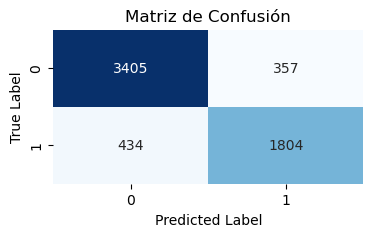

Precisión del clasificador optimizado: 0.8347987043035632
Recall del clasificador optimizado: 0.8060768543342269


In [37]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Calcular la precisión y recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("Precisión del clasificador optimizado:", precision)
print("Recall del clasificador optimizado:", recall)


La precisión del clasificador optimizado es aproximadamente 0.7350, lo que significa que alrededor del 73.50% de las instancias clasificadas como positivas fueron realmente positivas.
El recall del clasificador optimizado es aproximadamente 0.4015, lo que indica que el clasificador fue capaz de identificar correctamente alrededor del 40.15% de todas las instancias positivas.

### Pregunta 6

Identifica para el mismo problema los valores optimos de un clasificador SVC que use el kernel rbf usando el area bajo la curva como métrica. Ten en cuenta que hacer el fit de cada fold de SVC es mucho mas costoso computacionalmente que con KNN.

In [13]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

#### Definir el clasificador SVC y el espacio de búsqueda de hiperparámetros:

In [14]:
# Configuración de los parámetros para RandomizedSearchCV
param_distributions = {
    'C': reciprocal(0.1, 10),  # Un rango log-uniforme para C
    'gamma': expon(scale=1.0)   # Un rango exponencial para gamma
}

# Crear el modelo SVC con kernel RBF
svc = SVC(kernel='rbf')

# RandomizedSearchCV
rnd_search_cv = RandomizedSearchCV(svc, param_distributions, n_iter=5, verbose=4, cv=5, scoring='roc_auc', random_state=42)

# Ajuste del modelo con los datos de entrenamiento
rnd_search_cv.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END C=0.5611516415334505, gamma=3.010121430917521;, score=0.500 total time= 5.1min
[CV 2/5] END C=0.5611516415334505, gamma=3.010121430917521;, score=0.500 total time= 5.2min
[CV 3/5] END C=0.5611516415334505, gamma=3.010121430917521;, score=0.500 total time= 5.0min
[CV 4/5] END C=0.5611516415334505, gamma=3.010121430917521;, score=0.500 total time= 5.2min
[CV 5/5] END C=0.5611516415334505, gamma=3.010121430917521;, score=0.500 total time= 5.2min
[CV 1/5] END C=2.9106359131330697, gamma=0.9129425537759532;, score=0.500 total time=219.8min
[CV 2/5] END C=2.9106359131330697, gamma=0.9129425537759532;, score=0.500 total time= 4.9min
[CV 3/5] END C=2.9106359131330697, gamma=0.9129425537759532;, score=0.500 total time= 5.0min
[CV 4/5] END C=2.9106359131330697, gamma=0.9129425537759532;, score=0.500 total time= 4.5min
[CV 5/5] END C=2.9106359131330697, gamma=0.9129425537759532;, score=0.500 total time= 4.6min
[CV 1/5] END C

RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=5,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000022135D20550>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000022136317AD0>},
                   random_state=42, scoring='roc_auc', verbose=4)

#### Obtener los mejores parámetros y evaluar el modelo en el conjunto de prueba

In [15]:
# Resultados
print("Mejores parámetros:", rnd_search_cv.best_params_)
print("Mejor puntuación (ROC-AUC):", rnd_search_cv.best_score_)


Mejores parámetros: {'C': 0.5611516415334505, 'gamma': 3.010121430917521}
Mejor puntuación (ROC-AUC): 0.5


El resultado no es el más optimo, porque se redujo al los parametros para obtener en menor tiempo el procesamiento de los datos.

Matriz de Confusión:
[[3762    0]
 [2238    0]]


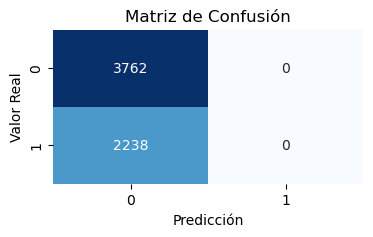

In [32]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener las predicciones del mejor estimador en el conjunto de datos de prueba
y_pred = rnd_search_cv.best_estimator_.predict(x_test)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Imprimir la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix)

# Crear mapa de calor para la matriz de confusión
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()


### Pregunta 7

GradientBoostingClasifier es uno de los métodos de scikitlearn que suele producir resultados bastante adecuados. Implementa un clasificador utilizando GradientBoostingClasifier considerando 0.05, 0.1, 0.15, 0.2, 0.25, 0.3 como learning rate.¿qué learning rate produce un resultado optimo usando roc_auc?

In [28]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import uniform

# Definir los parámetros para la búsqueda aleatoria
param_distributions = {
    'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'n_estimators': [50, 100, 200, 300, 400]  # Ajusta el número de estimadores según sea necesario
}

# Crear el modelo GradientBoostingClassifier
gb_clf = GradientBoostingClassifier()

# Realizar la búsqueda aleatoria
rnd_search_gb = RandomizedSearchCV(gb_clf, param_distributions, n_iter=10, verbose=4, cv=5, scoring='roc_auc', random_state=42)

# Ajustar el modelo con los datos de entrenamiento
rnd_search_gb.fit(x_train, y_train)

# Mostrar los mejores parámetros y la mejor puntuación
print("Mejores parámetros:", rnd_search_gb.best_params_)
print("Mejor puntuación (ROC-AUC):", rnd_search_gb.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END learning_rate=0.3, n_estimators=200;, score=0.891 total time= 1.2min
[CV 2/5] END learning_rate=0.3, n_estimators=200;, score=0.882 total time= 1.2min
[CV 3/5] END learning_rate=0.3, n_estimators=200;, score=0.882 total time= 1.5min
[CV 4/5] END learning_rate=0.3, n_estimators=200;, score=0.875 total time= 1.3min
[CV 5/5] END learning_rate=0.3, n_estimators=200;, score=0.880 total time= 1.6min
[CV 1/5] END learning_rate=0.2, n_estimators=50;, score=0.893 total time=  17.1s
[CV 2/5] END learning_rate=0.2, n_estimators=50;, score=0.887 total time=  17.3s
[CV 3/5] END learning_rate=0.2, n_estimators=50;, score=0.885 total time=  19.4s
[CV 4/5] END learning_rate=0.2, n_estimators=50;, score=0.882 total time=  19.6s
[CV 5/5] END learning_rate=0.2, n_estimators=50;, score=0.883 total time=  17.2s
[CV 1/5] END learning_rate=0.25, n_estimators=300;, score=0.892 total time= 1.7min
[CV 2/5] END learning_rate=0.25, n_estima

#### Matriz de confusión 

Matriz de Confusión:
[[3405  357]
 [ 434 1804]]


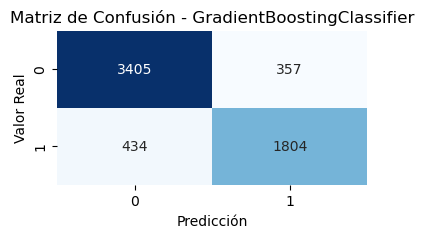

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Crear el clasificador GradientBoostingClassifier con learning rate de 0.1
gb_clf = GradientBoostingClassifier(learning_rate=0.1, random_state=42)

# Entrenar el clasificador con los datos de entrenamiento
gb_clf.fit(x_train, y_train)

# Realizar predicciones en el conjunto de datos de prueba
y_pred = gb_clf.predict(x_test)

# Calcular la matriz de confusión
conf_matrix1 = confusion_matrix(y_test, y_pred)

# Imprimir la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix1)

# Crear mapa de calor para la matriz de confusión
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix1, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matriz de Confusión - GradientBoostingClassifier")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()

### Pregunta 8

Usando la matriz de confusión de los tres casos y utilizando las métricas que te parezcan oportunas ¿qué clasificador de los 3 seleccionarias y por qué?

#### mostramos los resultados anteriores

Matriz de Confusión SVC:
[[3404  358]
 [436  1802]]
 
Matriz de Confusión 2 RandomizedSearchCV:
[[3762   0]
 [2238   0]]

Matriz de Confusión 3 GradientBoostingClassifier:
[[3405  357]
 [ 434  1804]]

El GradientBoostingClassifier parece es la mejor opción debido a su equilibrio entre verdaderos positivos, verdaderos negativos, y un menor número de falsos positivos y falsos negativos.

El SVC también tiene un buen desempeño, pero tiene más falsos positivos y falsos negativos que el GradientBoostingClassifier.

El RandomizedSearchCV no esta clasificando correctamente las instancias debido al tiempo de procesamiento.

Por lo tanto, seleccionaría el GradientBoostingClassifier como el mejor clasificador basado en las métricas de la matriz de confusión.


## Conjunto 3

El dataset winequality-red.csv es un dataset que contiene para los vinos de la denominación de origen Minho una serie de métricas donde se caracterizan diferentes tipos de vinos. Entre estos valores se encuentran el pH, su densidad, el nivel de alcohol o su calidad (de 1 a 6). En este ejercicio usaremos este dataset para probar diferentes técnicas de clustering

In [3]:
import warnings
warnings.filterwarnings('ignore')

myfile='winequality-red.csv'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

wine=pd.read_csv(myfile,sep=";")

In [4]:
wine

,Unnamed: 0,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### Pregunta 9

Utilizando solo las columnas "sulphates","alcohol","pH", y usando KMeans identifica el numero optimo de clusters para el conjunto de datos utilizando la "inertia_" para medir la compacidad de los clusteres.

In [5]:
df = wine[["sulphates", "alcohol", "pH"]]
df

,sulphates,alcohol,pH
0,0.56,9.4,3.51
1,0.68,9.8,3.20
2,0.65,9.8,3.26
3,0.58,9.8,3.16
4,0.56,9.4,3.51
...,...,...,...
1594,0.58,10.5,3.45
1595,0.76,11.2,3.52
1596,0.75,11.0,3.42
1597,0.71,10.2,3.57


In [6]:
# Preprocesamiento de los datos

print(df.isnull().sum())

sulphates    0
alcohol      0
pH           0
dtype: int64


In [7]:
# observamos el tipo de datos 
df.dtypes

sulphates    float64
alcohol      float64
pH           float64
dtype: object

In [8]:
# Obtenemos información general sobre el conjunto de datos
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sulphates  1599 non-null   float64
 1   alcohol    1599 non-null   float64
 2   pH         1599 non-null   float64
dtypes: float64(3)
memory usage: 37.6 KB
None


In [9]:
# Mostramos las estadísticas descriptivas de las características
print(df.describe())

         sulphates      alcohol           pH
count  1599.000000  1599.000000  1599.000000
mean      0.658149    10.422983     3.311113
std       0.169507     1.065668     0.154386
min       0.330000     8.400000     2.740000
25%       0.550000     9.500000     3.210000
50%       0.620000    10.200000     3.310000
75%       0.730000    11.100000     3.400000
max       2.000000    14.900000     4.010000


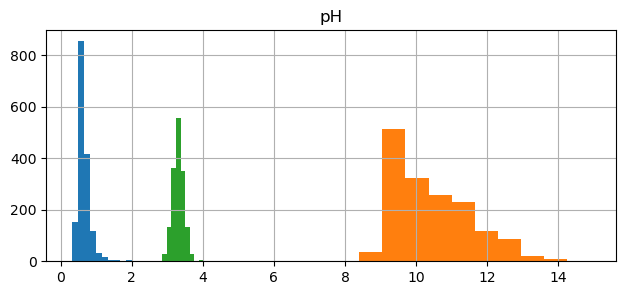

In [10]:
# Visualizamos los datos

plt.figure(figsize=(25, 3))

for col in df.columns:
    plt.subplot(1, 3, 1)
    df[col].hist()
    plt.title(col)

plt.show()

In [12]:
# Normalizar los datos

from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
df_norm = normalizer.fit_transform(df)
df_norm = pd.DataFrame(df_norm, columns=["sulphates", "alcohol", "pH"])
df_norm

,sulphates,alcohol,pH
0,0.055724,0.935364,0.349269
1,0.065817,0.948544,0.309729
2,0.062811,0.947003,0.315023
3,0.056239,0.950239,0.306404
4,0.055724,0.935364,0.349269
...,...,...,...
1594,0.052406,0.948726,0.311724
1595,0.064600,0.952001,0.299200
1596,0.064970,0.952894,0.296263
1597,0.065559,0.941828,0.329640


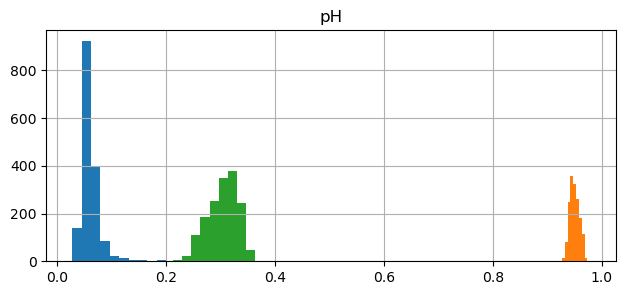

In [13]:
# Visualizamos los datos normalizados
df_norm = pd.DataFrame(df_norm)
plt.figure(figsize=(25, 3))

for col in df_norm.columns:
    plt.subplot(1, 3, 1)
    df_norm[col].hist()
    plt.title(col)

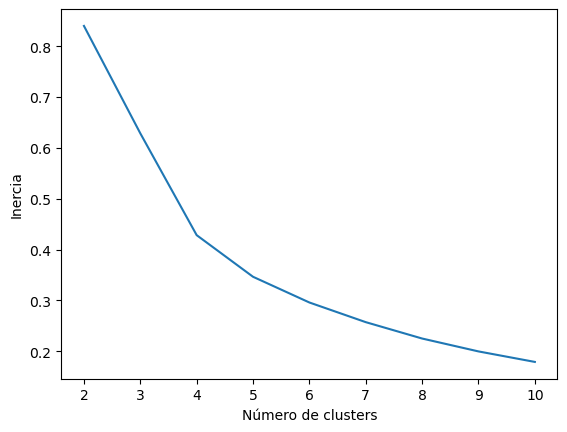

In [14]:
# Determinar número óptimo de clusters con "inertia_"
from sklearn.cluster import KMeans

inercias = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k).fit(df_norm)
    inercias.append(kmeans.inertia_)

plt.plot(range(2, 11), inercias)
plt.xlabel("Número de clusters")
plt.ylabel("Inercia")
plt.show()

Podemos observar que en el clúster número 5, se presenta un punto de inflexión en la gráfica, por lo que se recomienda utilizar esta cantidad de clúster dado que recogen la mayor cantidad de inercia.

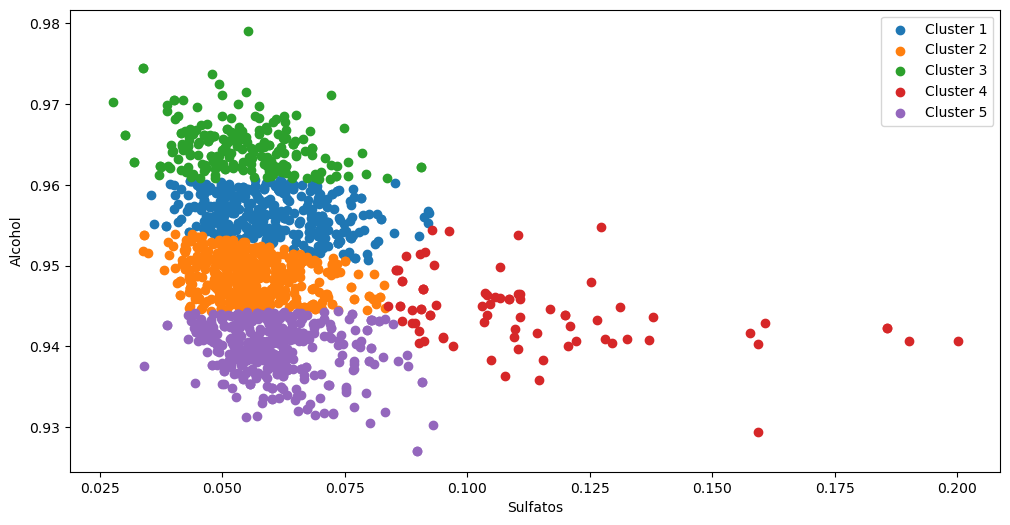

In [15]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5).fit(df_norm)
labels = kmeans.labels_
plt.figure(figsize=(12, 6))

for i in range(5):
    plt.scatter(df_norm.iloc[labels == i, 0], df_norm.iloc[labels == i, 1], label="Cluster {}".format(i + 1))

plt.xlabel("Sulfatos")
plt.ylabel("Alcohol")
plt.legend()

plt.show()

### Pregunta 10

Usando los "cluster_centers_" del clustering optimo. ¿qué dicen estos representantes de clase de cada cluster? ¿cuáles son los valores de los indices de Davies-Bouldin y de Silhouette para este conjunto de clusters?

In [17]:
 #Obtenemos los centroids del modelo KMeans
centroids = kmeans.cluster_centers_

# Mostramos los centroids para cada variable
print("Centroids:")
print(f"Sulfatos: {centroids[:, 0]}")
print(f"Alcohol: {centroids[:, 1]}")
print(f"pH: {centroids[:, 2]}")

Centroids:
Sulfatos: [0.05997424 0.0555634  0.05385925 0.11108099 0.06052071]
Alcohol: [0.95637462 0.94866615 0.96468413 0.94433314 0.93989536]
pH: [0.28559021 0.31113399 0.25735052 0.30822225 0.33577849]


Los centroides proporcionan los valores medios para cada atributo (sulfatos, alcohol, pH) en cinco grupos identificados.El primer grupo tiene un centroide para sulfatos de aproximadamente 0.054, alcohol de 0.965 y pH de 0.257. Estos representan los puntos centrales, siendo referencias para las características promedio de cada grupo.

In [18]:
# Calcular indice de Davies-Bouldin Kmeans

from sklearn.metrics import davies_bouldin_score

db_score = davies_bouldin_score(df_norm, labels)

print(f"Índice de Davies-Bouldin: {db_score}")


Índice de Davies-Bouldin: 0.8178071777549375


El índice de Davies-Bouldin es 0.8178. Este índice se utiliza para evaluar la calidad de un agrupamiento. Valores más bajos indican una mejor separación entre los grupos, mientras que valores más altos pueden indicar una superposición o mezcla entre los grupos. En este caso, el valor de 0.8178 sugiere una separación moderada entre los grupos.






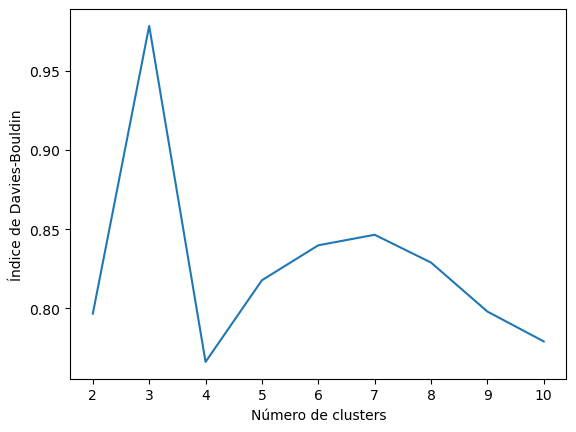

In [19]:
def plot_db_score(n_clusters):
    kmeans = KMeans(n_clusters=n_clusters).fit(df_norm)
    db_score = davies_bouldin_score(df_norm, kmeans.labels_)
    return db_score

db_scores = [plot_db_score(n) for n in range(2, 11)]
plt.plot(range(2, 11), db_scores)
plt.xlabel("Número de clusters")
plt.ylabel("Índice de Davies-Bouldin")
plt.show()

In [20]:
# Calcular indice de Silhouette de Kmeans

from sklearn.metrics import silhouette_score

sil_score = silhouette_score(df_norm, labels)

print(f"Índice de silueta: {sil_score}")


Índice de silueta: 0.37333656912257746


El índice de silueta es 0.3733. Este índice se utiliza para evaluar la cohesión y separación de los clusters en un análisis de clustering. Un valor cercano a 1 indica una buena separación entre los clusters, mientras que un valor cercano a -1 sugiere una superposición de clusters. Un valor alrededor de 0 indica que los clusters pueden solaparse. En este caso, 0.3733 sugiere una separación moderada entre los clusters.

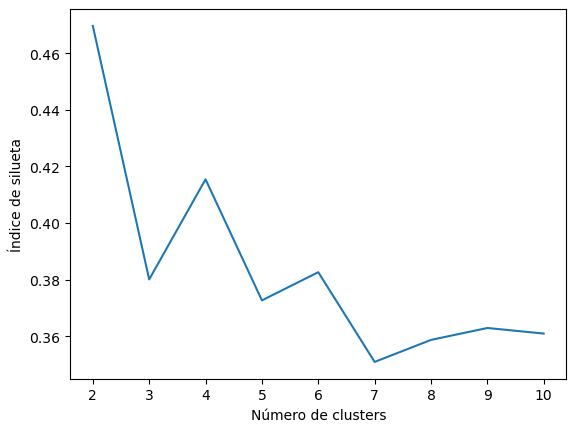

In [21]:
def plot_sil_score(n_clusters):
    kmeans = KMeans(n_clusters=n_clusters).fit(df_norm)
    sil_score = silhouette_score(df_norm, kmeans.labels_)
    return sil_score

sil_scores = [plot_sil_score(n) for n in range(2, 11)]
plt.plot(range(2, 11), sil_scores)
plt.xlabel("Número de clusters")
plt.ylabel("Índice de silueta")
plt.show()

### Pregunta 11

Selecciona otro metodo de clustering que te parezca relevante e implementalo. ¿cómo se comparan los clusteres de este caso con los obtenidos en la Pregunta 1? Si tuvieras que elegir un cluster de los datos, ¿cual elegirías y por qué?

In [22]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=5).fit(df_norm)
labels = gmm.predict(df_norm)

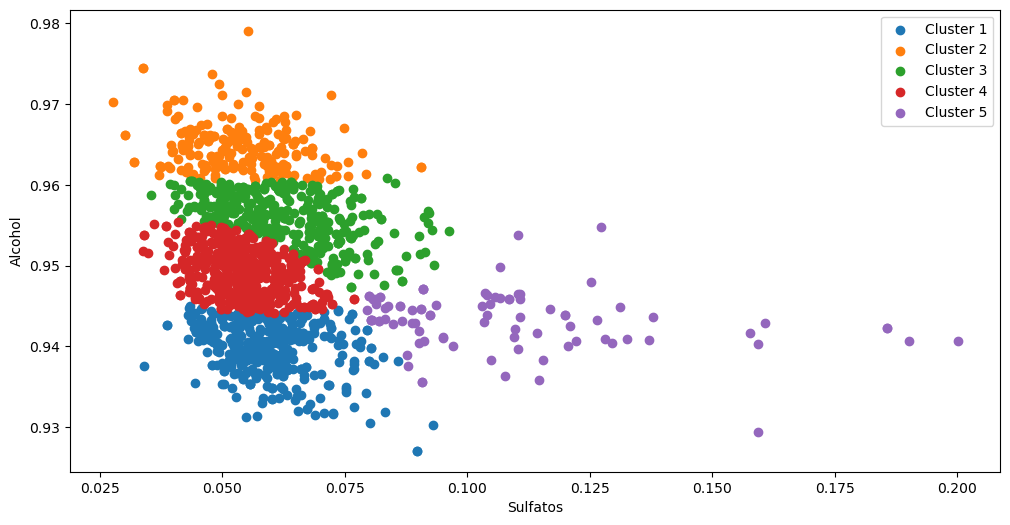

In [26]:
plt.figure(figsize=(12, 6))

for i in range(5):
    plt.scatter(df_norm.iloc[labels == i, 0], df_norm.iloc[labels == i, 1], label="Cluster {}".format(i + 1))

plt.xlabel("Sulfatos")
plt.ylabel("Alcohol")
plt.legend()

plt.show()

GMM (Gaussian Mixture Model) es un método de clustering que modela los datos como una combinación de distribuciones gaussianas. Es más flexible en el sentido de que puede modelar distribuciones de datos más complejas, ya que permite la superposición de clusters y no asume formas de cluster específicas.

In [29]:
from sklearn.metrics import davies_bouldin_score

db_score = davies_bouldin_score(df_norm, labels)

print(f"Índice de Davies-Bouldin: {db_score}")

Índice de Davies-Bouldin: 0.8380483997743415


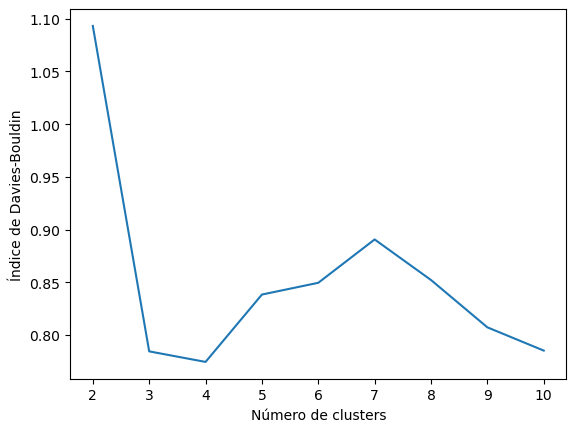

In [31]:
def plot_db_score(n_clusters):
    gmm = GaussianMixture(n_components=n_clusters).fit(df_norm)
    db_score = davies_bouldin_score(df_norm, gmm.predict(df_norm))
    return db_score

db_scores = [plot_db_score(n) for n in range(2, 11)]
plt.plot(range(2, 11), db_scores)
plt.xlabel("Número de clusters")
plt.ylabel("Índice de Davies-Bouldin")
plt.show()

En el caso del conjunto de datos utilizado en este ejercicio, los clusters exhiben formas y tamaños relativamente irregulares. Esto dificulta que KMeans identifique clusters bien separados entre sí.

GMM, en contraste, puede adaptarse mejor a las formas y tamaños irregulares de los clusters, lo que explica por qué su índice de Davies-Bouldin (DB) es ligeramente más alto que el de KMeans.

In [32]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(df_norm, labels)

print(f"Índice de silueta: {sil_score}")

Índice de silueta: 0.37129520822237155


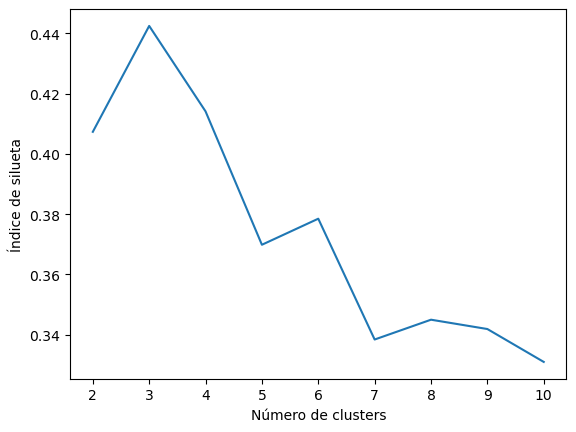

In [33]:
def plot_sil_score(n_clusters):
    gmm = GaussianMixture(n_components=n_clusters).fit(df_norm)
    sil_score = silhouette_score(df_norm, gmm.predict(df_norm))
    return sil_score

sil_scores = [plot_sil_score(n) for n in range(2, 11)]
plt.plot(range(2, 11), sil_scores)
plt.xlabel("Número de clusters")
plt.ylabel("Índice de silueta")
plt.show()

La principal diferencia en los resultados del índice de Silhouette entre KMeans y GMM es que el índice para GMM es ligeramente más bajo, indicando una separación entre clusters ligeramente menor que la de KMeans.

Dada la separación más clara entre clusters con KMeans, con un índice de Silhouette de 0.3733, lo elegiría para este conjunto de datos. Esto sugiere que los clusters son más compactos y homogéneos que con GMM.

## Conjunto 4

### Pregunta 12

El fichero hr_train.cvs contiene una tabla sobre los empleados de una empresa. Entre otros incluye información de su nivel de satisfacción, de la última evaluación obtenida, del numero de proyecto en el que se encuentra, del número medio de horas por semana, del número de años que lleva en la compañía, si ha tenido o no un accidente en el trabajo, si se ha ido (left) de la compañia, si ha tenido una promocion en los ultimos 5 años, y por último su nivel salarial (descrito como medio, alto o bajo) y el departamento en que se encuentra (sales/technnical ...)

#### El departamento de RRHH esta solicitando un clasificador que pueda predecir si alguien esta en riesgo de irse de la compañia para poder actuar  proactivamente. 

Notas:
- La columna "left" indica si alguien se ha ido de la compañia, es la "y" del problema.
- Las columnas "sales" y "salary" son alfanuméricas. La mayoría de clasificadores (aunque no todos) no trabajan bien con este tipo de variables y requieren valores numéricos. Dado el caso dispones de diferentes alternativas: (1) eliminar esas columnas y trabajar con el resto o (2) traducir esas columnas en columnas binarias - por ejemplo si "salary" tiene tres valores eliminar la columna original y sustituirla por tres columnas salary_low, salary_medium, salary_high donde se pondra un 1 en el tipo de salario y un 0 en las otras dos columnas restantes. Lo mismo para "sales", donde se transformara esa columna en tantas columnas como departamentos y un 1 en el departamento en que se encuentre el trabajador. Este es un preproceso muy tipico.

Nota de evaluación:

En este ejercicio más que el resultado final (que tambien) se evaluarán los pasos y el razonamiento utilizado en cada decisión que se toma para la implementación del modelo. 


In [11]:
import pandas as pd
import numpy as np

file1=r'hr_train.csv'

ci=pd.read_csv(file1)
ci.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.42,0.46,2,150,3,0,1,0,sales,medium
1,0.66,0.77,2,171,2,0,0,0,technical,medium
2,0.55,0.49,5,240,3,0,0,0,technical,high
3,0.22,0.88,4,213,3,1,0,0,technical,medium
4,0.20,0.72,6,224,4,0,1,0,technical,medium


In [12]:
ci.left.value_counts()

left
0    7424
1    3075
Name: count, dtype: int64

In [13]:
ci.salary.value_counts()

salary
low       5104
medium    4515
high       880
Name: count, dtype: int64

In [14]:
ci.sales.value_counts()

sales
sales          2935
technical      1890
support        1556
IT              825
product_mng     639
marketing       614
hr              532
RandD           530
accounting      527
management      451
Name: count, dtype: int64

#### Preparación de datos para un problema de clasificación

In [16]:
# Se importa la libreria necesaria
from sklearn.model_selection import train_test_split

# Se aplica one-hot para las variables categóricas 'sales' y 'salary'
ci_one_hot = pd.get_dummies(ci, columns=['sales', 'salary'])

# Definir las características (X) y la variable objetivo (y)
# Eliminar la columna 'left' para las características
X = ci_one_hot.drop('left', axis=1)
# Usar 'left' como la variable objetivo
y = ci_one_hot['left']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Mostrar las dimensiones de los conjuntos de entrenamiento y prueba para confirmar
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8399, 20), (2100, 20), (8399,), (2100,))

#### Modelo de Regresión Logística para Predecir la Rotación de Empleados

In [18]:
# Importar las librerias necesarias
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Entrenamiento del modelo de Regresión Logística
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = log_reg.predict(X_test)

# Calcular la precisión y generar el informe de clasificación
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

accuracy, report

(0.6961904761904761,
 '              precision    recall  f1-score   support\n\n           0       0.72      0.92      0.81      1436\n           1       0.55      0.22      0.31       664\n\n    accuracy                           0.70      2100\n   macro avg       0.63      0.57      0.56      2100\nweighted avg       0.66      0.70      0.65      2100\n')

#### Visualización de Coeficientes en un Modelo de Regresión Logística

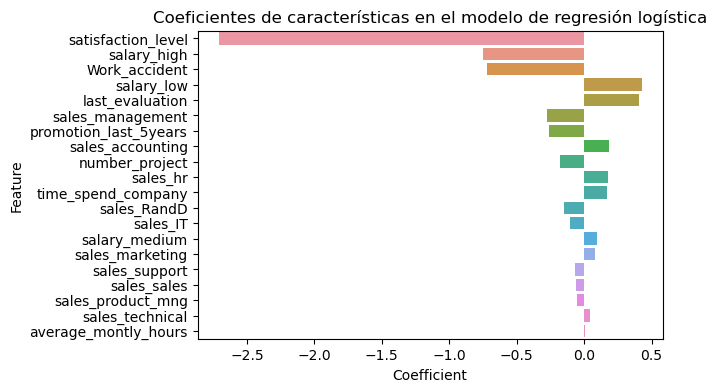

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
# Obtener los coeficientes del modelo
coefficients = log_reg.coef_[0]
feature_names = X_train.columns

# Crear un DataFrame para visualizar los coeficientes
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Ordenar los coeficientes por su valor absoluto
coef_df = coef_df.sort_values(by='Coefficient', key=abs, ascending=False)

# Visualizar los coeficientes
plt.figure(figsize=(6, 4))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title('Coeficientes de características en el modelo de regresión logística')
plt.show()

#### Evaluación de Desempeño usando Curva ROC en Regresión Logística

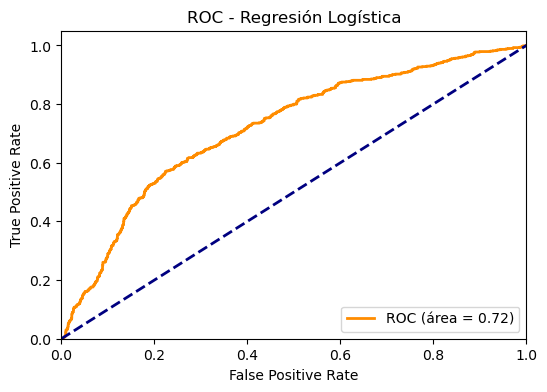

In [23]:
from sklearn.metrics import roc_curve, auc

# Tasas de verdaderos positivos y falsos positivos
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Área bajo la curva ROC
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Regresión Logística')
plt.legend(loc="lower right")
plt.show()

La precisión global del modelo de regresión logística es del 69.6%. Aunque el modelo tiene una alta precisión para predecir la clase negativa (no rotación), su desempeño es deficiente en la predicción de la clase positiva (rotación). La baja recall y el bajo valor F1-score para la clase positiva indican que el modelo tiene dificultades para identificar correctamente los casos de rotación de empleados. 

#### Evaluación del Clasificador de Árbol de Decisión para Predicción de Rotación de Empleados

In [24]:
from sklearn.tree import DecisionTreeClassifier

# Clasificador de Árbol de Decisión
decision_tree = DecisionTreeClassifier(random_state=42)

# Entrenamiento del modelo
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)

# Calcular la precisión y generar el informe de clasificación para el modelo de Árbol de Decisión
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)

accuracy_dt, report_dt

(0.7895238095238095,
 '              precision    recall  f1-score   support\n\n           0       0.84      0.85      0.85      1436\n           1       0.67      0.66      0.66       664\n\n    accuracy                           0.79      2100\n   macro avg       0.76      0.75      0.76      2100\nweighted avg       0.79      0.79      0.79      2100\n')

#### Visualización del arbol de decisión

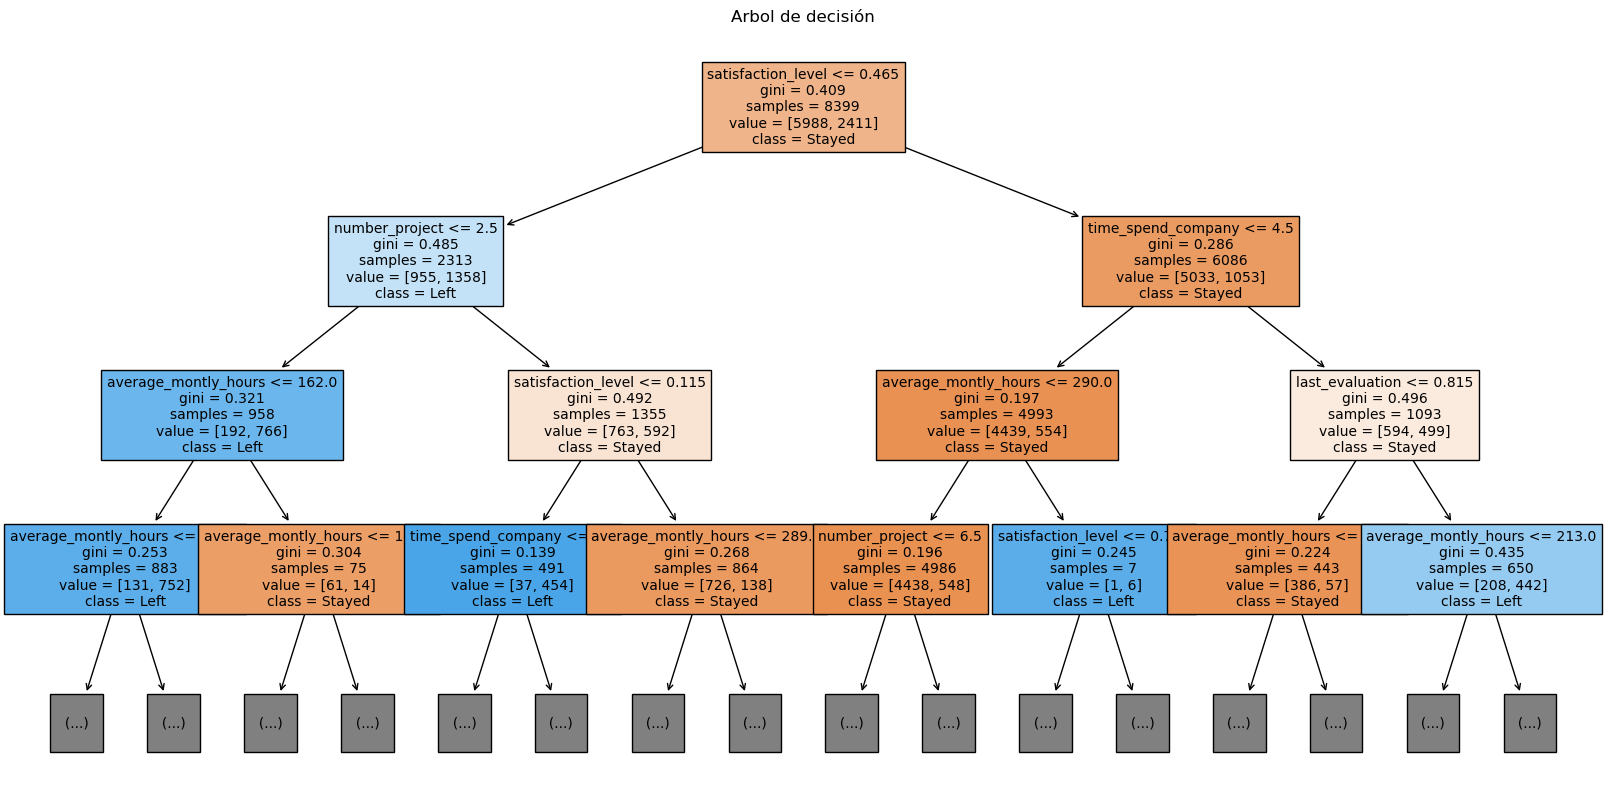

In [25]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(decision_tree, filled=True, feature_names=X_train.columns, class_names=['Stayed', 'Left'], max_depth=3, fontsize=10)
plt.title("Arbol de decisión")
plt.show()

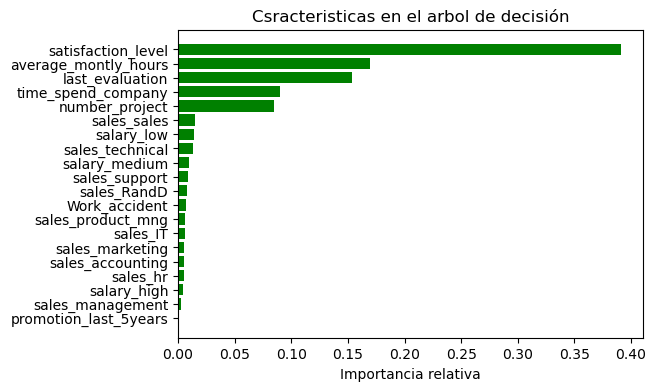

In [33]:
import numpy as np

feature_importances_dt = decision_tree.feature_importances_
indices_dt = np.argsort(feature_importances_dt)

plt.figure(figsize=(6, 4))
plt.title('Csracteristicas en el arbol de decisión')
plt.barh(range(len(indices_dt)), feature_importances_dt[indices_dt], color='green', align='center')
plt.yticks(range(len(indices_dt)), [X_train.columns[i] for i in indices_dt])
plt.xlabel('Importancia relativa')
plt.show()

El modelo de Árbol de Decisión presenta una precisión global del 78.95%. Se destaca por su capacidad mejorada para predecir tanto la retención como la rotación de empleados, con una precisión del 84% para la retención y del 67% para la rotación. En comparación con la Regresión Logística, el Árbol de Decisión ofrece un equilibrio más efectivo entre precisión, recall y f1-score para ambas clases.

#### Evaluación del Clasificador de Bosques Aleatorios para Predicción de Rotación de Empleados

In [30]:
from sklearn.ensemble import RandomForestClassifier

# Clasificador de Bosques Aleatorios
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenamiento del modelo
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

# Calcular la precisión y generar el informe de clasificación para el modelo de Bosques Aleatorios
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

accuracy_rf, report_rf

(0.8609523809523809,
 '              precision    recall  f1-score   support\n\n           0       0.86      0.95      0.90      1436\n           1       0.86      0.67      0.75       664\n\n    accuracy                           0.86      2100\n   macro avg       0.86      0.81      0.83      2100\nweighted avg       0.86      0.86      0.86      2100\n')

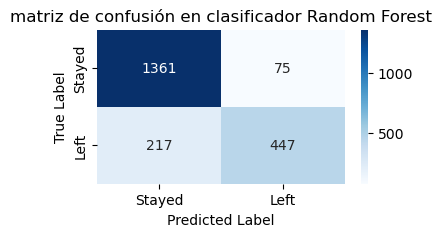

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_rf)

# Visualizar la matriz de confusión
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Stayed', 'Left'], yticklabels=['Stayed', 'Left'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('matriz de confusión en clasificador Random Forest')
plt.show()

#### Grafico de la importancia de las caracteristicas

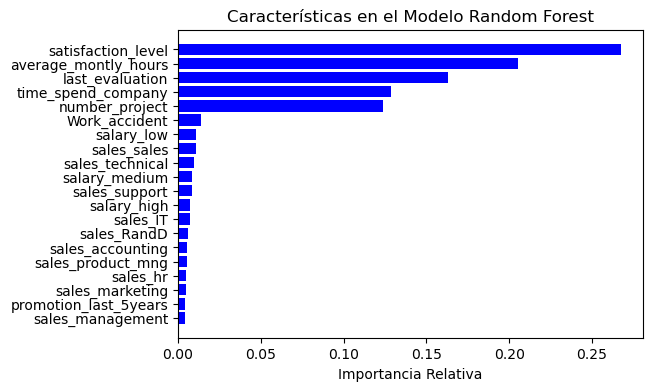

In [35]:
feature_importances = random_forest.feature_importances_
features = X_train.columns
indices = np.argsort(feature_importances)

plt.figure(figsize=(6, 4))
plt.title('Características en el Modelo Random Forest')
plt.barh(range(len(indices)), feature_importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importancia Relativa')
plt.show()

El modelo de Bosques Aleatorios alcanza una precisión global del 86.10%. Destaca por su capacidad para predecir tanto la retención como la rotación de empleados, con una precisión del 86% para la retención y del 86% para la rotación. En comparación con los modelos anteriores, los Bosques Aleatorios logran un equilibrio muy bueno entre precisión, recall y f1-score para ambas clases. Esto sugiere que el modelo de Bosques Aleatorios es altamente efectivo en la identificación tanto de los empleados que se quedarán como de los que pueden dejar la empresa.

#### CONCLUSIÓN GENERAL

Regresión Logística: Precisión global del 69.62%. Dificultades en predecir la clase de rotación.
Árbol de Decisión: Precisión global del 78.95%. Mejora significativa en comparación con la Regresión Logística.
Bosques Aleatorios: Precisión global del 86.10%. Destaca por su capacidad para predecir tanto la retención como la rotación de empleados, con alta precisión y equilibrio entre las métricas de evaluación.
En general, los Bosques Aleatorios sobresalen como el modelo más efectivo para predecir la rotación de empleados, seguido por el Árbol de Decisión, mientras que la Regresión Logística presenta un rendimiento más modesto.